# Plot

## Librairies

In [334]:
import os

import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Preliminary function

In [340]:
def compute_abs_diffs(synapses_l):

    abs_diff_l = []

    for i in range(len(synapses_l)-1):

        abs_diff = np.sum(np.abs(synapses_l[i+1] - synapses_l[i]))
        abs_diff_l.append(abs_diff)

    return abs_diff_l

## Plot for mode `stdp`

In [341]:
filename = "sim_stdp_1001_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [342]:
nb_attractors, synapses_l = results[0], results[1]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])

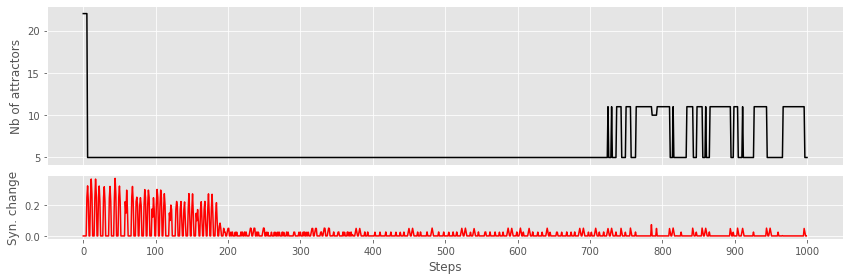

In [343]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
# ## Add colored regions for each input chunk
# for start, end in zip(t0s, t1s):
#     ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `gp`

In [344]:
filename = "sim_gp_1001_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [345]:
nb_attractors = results[0][1:] # remove first element (initial A)
nb_attractors = [-x for x in nb_attractors]
input_length = int(filename.split("_")[2])

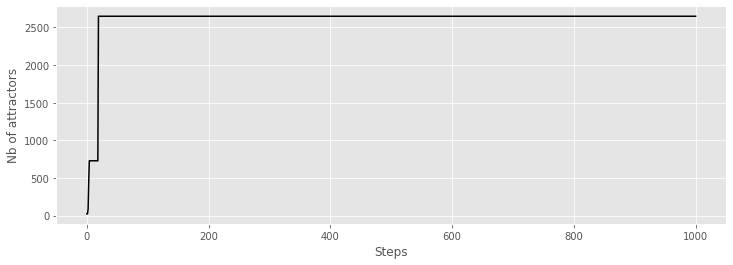

In [346]:
plt.figure(figsize=(12, 4))

# Plot number of attractors
plt.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
plt.xlabel('Steps', size=12)
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `stdp-gp`

In [347]:
filename = "sim_stdp-gp_1001_50_10_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [348]:
nb_attractors, ticks, synapses_l = results[0], results[1], results[2]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])
target_length = int(filename.split("_")[3])

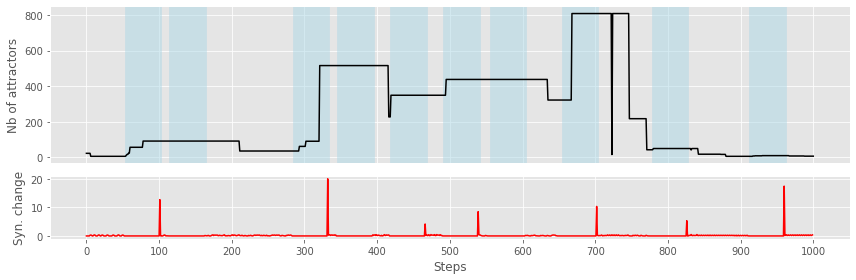

In [349]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Chunks start and end points
t0s = ticks
t1s = [start + target_length for start in t0s]

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Combined plots

In [542]:
filespecs = (1001, 50, 10)
input_length = filespecs[0]
trigger_length = filespecs[1]
nb_triggers = filespecs[2]
seed = 83

In [543]:
filename_stdp = f"sim_stdp_{input_length}_seed{seed}.pkl"
filename_gp = f"sim_gp_{input_length}_seed{seed}.pkl"
filename_stdpgp = f"sim_stdp-gp_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pkl"

In [544]:
file_d = {}

with open(filename_stdp, "rb") as fh:
    results = pickle.load(fh)
    file_d["stdp"] = results

with open(filename_gp, "rb") as fh:
    results_gp = pickle.load(fh)
    file_d["gp"] = results

with open(filename_stdpgp, "rb") as fh:
    results = pickle.load(fh)
    file_d["stdp-gp"] = results

In [ ]:
results_d = {}

for mode in ["stdp", "gp", "stdp-gp"]:

    results_d[mode] = {}
    results = file_d[mode]
    
    if mode == "gp":
        nb_attractors = results[0][:input_length]  # sometimes 1 step too much...
        nb_attractors = (-np.array(nb_attractors)).tolist()
        results_d[mode]["nb_attractors"] = nb_attractors

    elif mode == "stdp":
        nb_attractors = results[0][:input_length]  # sometimes 1 step too much...
        results_d[mode]["nb_attractors"] = nb_attractors
        synapses_l = results[1]
        abs_diff_l = compute_abs_diffs(synapses_l)
        results_d[mode]["syn_change"] = abs_diff_l

    elif  mode == "stdp-gp":
        nb_attractors = results[0][:input_length]  # sometimes 1 step too much...
        results_d[mode]["nb_attractors"] = nb_attractors
        ticks = results[1]
        results_d[mode]["ticks"] = ticks
        synapses_l = results[2][:input_length]     # sometimes 1 step too much...
        abs_diff_l = compute_abs_diffs(synapses_l)
        results_d[mode]["syn_change"] = abs_diff_l


In [546]:
len(results_d["stdp-gp"]["nb_attractors"])

1001

In [ ]:
results_d["stdp"].keys(), results_d["gp"].keys(), results_d["stdp-gp"].keys()
# results_d["gp"]["syn_change"]

(dict_keys(['nb_attractors', 'abs_diff_l']),
 dict_keys(['nb_attractors']),
 dict_keys(['nb_attractors', 'ticks', 'abs_diff_l']))

In [ ]:
def plot(results_d):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

    # Chunks start and end points
    t0s = ticks
    t1s = [start + trigger_length for start in t0s]

    # Plot number of attractors
    ax1.plot(range(input_length), results_d["stdp-gp"]["nb_attractors"], label='STDP-GP')
    ax1.plot(range(input_length), results_d["stdp"]["nb_attractors"], label='STDP')
    ax1.plot(range(input_length), results_d["gp"]["nb_attractors"], label='GP')
    ax1.set_ylabel('Nb of attractors', size=12)
    ax1.grid(True)
    ax1.tick_params(bottom = False) 
    ## Add colored regions for each input chunk
    for start, end in zip(t0s, t1s):
        ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")
    ax1.legend()

    # Plot synaptic abs changes
    ax2.plot(range(input_length-1), results_d["stdp-gp"]["syn_change"], color='red', alpha=1)
    ax2.set_xlabel('Steps', size=12)
    ax2.set_ylabel('Syn. change', size=12)
    ax2.set_xticks(range(0, input_length, 100))
    ax2.tick_params(axis='y')
    ax2.grid(True)

    fig.tight_layout()
    # plt.savefig("plots/STDP_19.pdf")
    plt.show()

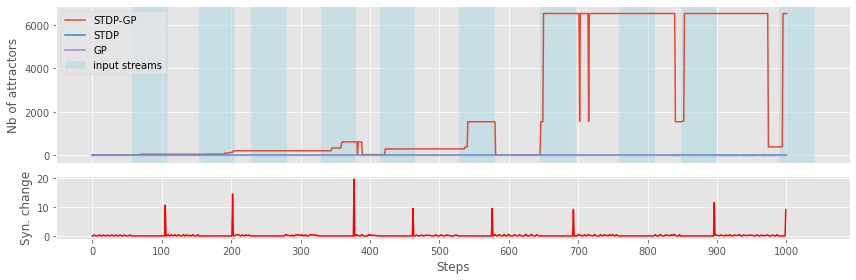

In [549]:
plot(results_d)